In [1]:
import pandas as pd

df = pd.read_csv('/Users/marcos/Desktop/data-analysis-homework/pset2/Tweets.csv')

In [3]:
import re
from nltk.corpus import stopwords
from textblob import TextBlob

# clean tweet text

def preprocess_text(text):
    # Remove special characters, links, and extra whitespaces
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(text.split())
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [4]:
# Analyze tweet sentiment

def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Assign sentiment polarity: positive, negative, neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment'] = df['cleaned_text'].apply(analyze_sentiment)

/var/folders/fx/dlcjt8q50hl113tcb7c09cjm0000gn/T/ipykernel_88108/495436049.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


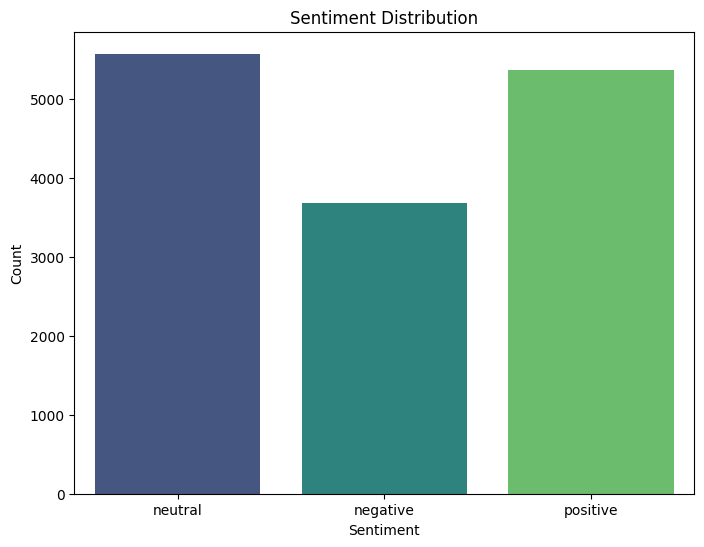

In [5]:
# Plotting the results

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()